In [2]:
from ms_deisotope import MSFileLoader
from pathlib import Path
import numpy as np
from ms_deisopteDF import path2df


In [3]:
path = Path(r'D:\fork\isas_lipidxplorer\test_resources\small_test\190321_Serum_Lipidextract_368723_02.mzML')

In [5]:
df = path2df(path)

TypeError: data type not understood

In [ ]:
ms1_mask = df.index.get_level_values(3).str.contains(' ms ')
ms1_df = df[ms1_mask]


# get accurate resolution


In [ ]:
tmp_mzs = ms1_df.reset_index().sort_values(['scan_id','mz']).mz

In [ ]:
tmp_mzs = tmp_mzs.to_frame()

In [ ]:
tmp_mzs['diffs'] = tmp_mzs.mz.diff()

In [ ]:

tmp_mzs = tmp_mzs[tmp_mzs.diffs > 0]



In [ ]:
tmp_mzs = tmp_mzs.loc[tmp_mzs.diffs == tmp_mzs.groupby(tmp_mzs.mz.round())['diffs'].transform('min')]

In [ ]:
tmp_mzs = tmp_mzs.sort_values('mz', ascending=False)
    

In [ ]:
tmp_mzs['res'] = tmp_mzs.mz / tmp_mzs.diffs
tmp_mzs

,mz,diffs,res
28727,1991.819946,20.613647,96.626274
41505,1991.031128,5.731445,347.387268
30418,1990.000122,16.143188,123.271812
39910,1988.794556,1.000488,1987.823975
39909,1987.794067,14.942261,133.031677
...,...,...,...
55305,352.873962,0.001709,206481.671875
10600,352.306396,0.002319,151899.687500
96673,350.877045,0.002167,161937.171875
74507,350.187164,0.002350,149025.109375


In [ ]:
listed = []
tmp_mzs_it = tmp_mzs.iterrows()
_ , r_mz = next(tmp_mzs_it)
_ , m_mz = next(tmp_mzs_it)
for idx, l_mz in tmp_mzs_it:
    if l_mz.res >= m_mz.res >= r_mz.res:
        listed.append(idx)
        r_mz = m_mz
        m_mz = l_mz


listed

[39910,
 20254,
 15699,
 33513,
 18115,
 5694,
 44622,
 10537,
 27004,
 94217,
 118715,
 70979,
 87960,
 7325]

In [ ]:
tmp = tmp_mzs.loc[listed]
tmp

,mz,diffs,res
39910,1988.794556,1.000488,1987.823975
20254,1986.522339,0.465576,4266.804199
15699,1974.659058,0.187744,10517.820312
33513,1973.666870,0.032837,60105.125000
18115,1887.611450,0.028564,66082.531250
5694,1566.156860,0.020386,76826.085938
44622,1553.422729,0.016724,92887.875000
10537,1427.182495,0.007080,201577.218750
27004,1341.218140,0.003296,406935.531250
94217,961.747498,0.002075,463449.156250


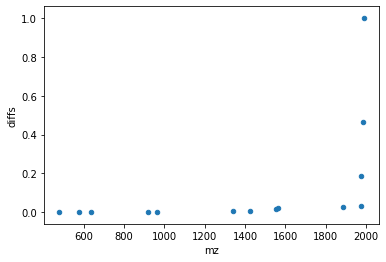

In [ ]:
tmp.plot.scatter(x='mz',y='diffs')

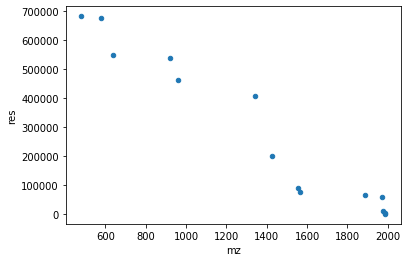

In [ ]:
tmp.plot.scatter(x='mz',y='res')

In [ ]:
tmp_mzs.to_clipboard()

In [ ]:
tmp_mzs

,mz,diffs,res
28727,1991.819946,20.613647,96.626274
41505,1991.031128,5.731445,347.387268
30418,1990.000122,16.143188,123.271812
39910,1988.794556,1.000488,1987.823975
39909,1987.794067,14.942261,133.031677
...,...,...,...
55305,352.873962,0.001709,206481.671875
10600,352.306396,0.002319,151899.687500
96673,350.877045,0.002167,161937.171875
74507,350.187164,0.002350,149025.109375


In [ ]:
current_mz = 0
res = []
for idx, item in tmp_mzs.sort_values('res', ascending= False).iterrows():
    if item.mz > current_mz:
        res.append(idx)
        current_mz = item.mz

In [ ]:
tmp_mzs.sort_values('res', ascending= False)

,mz,diffs,res
7325,479.249359,0.000702,682784.500000
87960,577.510986,0.000854,675852.875000
37125,520.443298,0.000793,655918.687500
99810,480.312408,0.000732,655786.562500
7102,458.009705,0.000824,555854.125000
...,...,...,...
10582,1832.851807,72.900513,25.141823
55,1440.556519,66.615723,21.624872
119,1604.023926,105.006592,15.275459
58,1798.553711,154.767212,11.621025


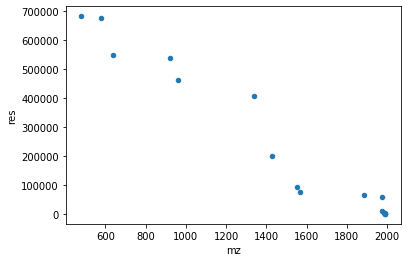

In [ ]:
tmp_mzs.loc[res].plot.scatter(x='mz',y='res')

In [ ]:
len(res)

16

In [ ]:
sel = tmp_mzs.loc[res]
sel

,mz,diffs,res,curve
7325,479.249359,0.000702,682784.500000,155658.406250
87960,577.510986,0.000854,675852.875000,135819.625000
70979,636.550110,0.001160,548907.187500,124543.734375
118715,920.757629,0.001709,538774.750000,77027.171875
94217,961.747498,0.002075,463449.156250,71098.343750
27004,1341.218140,0.003296,406935.531250,27274.703125
10537,1427.182495,0.007080,201577.218750,20121.296875
44622,1553.422729,0.016724,92887.875000,11473.953125
5694,1566.156860,0.020386,76826.085938,10724.375000
18115,1887.611450,0.028564,66082.531250,-748.468750


In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#https://machinelearningmastery.com/curve-fitting-with-python/

SyntaxError: invalid syntax (Temp/ipykernel_17668/3800985755.py, line 1)

In [ ]:
from scipy.optimize import curve_fit
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

def objective2(x, a, b): #suggested by dominick because it only rises
	return a * 1/x + b


popt, _ = curve_fit(objective1, sel.mz.to_numpy(), sel.res.to_numpy())
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

# calculate the output for the range
sel['curve'] = objective(sel.mz, a, b, c)


y = -581.52671 * x + 0.04931 * x^2 + 965724.44848


In [ ]:
tmp_mzs

,mz,diffs,res,curve
7325,479.249359,0.000702,682784.500000,698352.8750
87960,577.510986,0.000854,675852.875000,646331.1250
70979,636.550110,0.001160,548907.187500,615532.3750
118715,920.757629,0.001709,538774.750000,472081.1875
94217,961.747498,0.002075,463449.156250,452049.1875
27004,1341.218140,0.003296,406935.531250,274466.3750
10537,1427.182495,0.007080,201577.218750,236210.0625
44622,1553.422729,0.016724,92887.875000,181350.6875
5694,1566.156860,0.020386,76826.085938,175904.1875
18115,1887.611450,0.028564,66082.531250,43711.5000


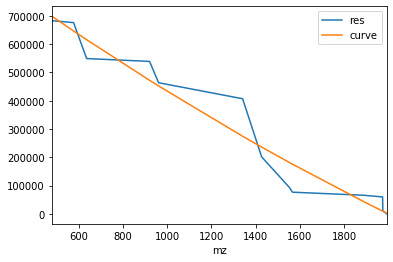

In [ ]:
import matplotlib.pyplot as plt
ax = plt.gca()
sel.plot(kind='line', x='mz',y='res', ax=ax)
sel.plot(kind='line',x='mz',y='curve', ax=ax)
plt.show()